In [101]:
#importing os to have our train and test directories
import os

In [102]:
#using os to make train and test folders in which our image dataset will be present
train_folder = os.path.join('C:/Users/adity/Downloads/Desktop - Copy/archive/FER_2013' ,'train')
test_folder = os.path.join('C:/Users/adity/Downloads/Desktop - Copy/archive/FER_2013', 'test')

print('Train folder path:', train_folder)
print('Test folder path:', test_folder)

Train folder path: C:/Users/adity/Downloads/Desktop - Copy/archive/FER_2013\train
Test folder path: C:/Users/adity/Downloads/Desktop - Copy/archive/FER_2013\test


In [103]:
#importing necessary dependencies
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
import random

In [104]:
#using image data generator to rescale,zoom,rotate our training images
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

In [105]:
#making separate image data generator for test images
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [106]:
data_dir = train_folder

In [107]:
#applying data augmentation to out training images,defining image_size and batch_size
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

Found 25841 images belonging to 7 classes.


In [108]:
#data augmentation on validation images,defining image_size and batch_size
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset='validation'
)

Found 2868 images belonging to 7 classes.


In [109]:
test_dir=test_folder

In [110]:
test_generator=test_datagen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [122]:
#iterating over to the next batch in the train_generator
img,label=train_generator.__next__()

In [123]:
#defining class labels for our input images
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

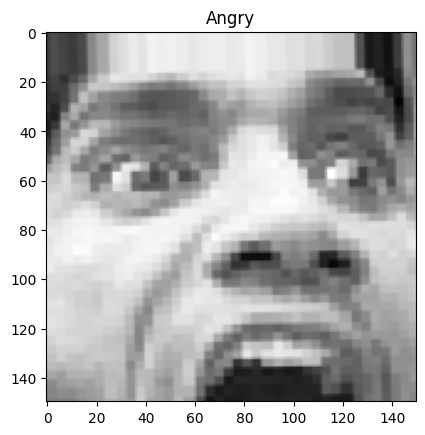

In [124]:
#showing a random image and its label from a particular batch in the train generator dataset
i=random.randint(0,img.shape[0]-1)
image=img[i]
label=class_labels[label[i].argmax()]
plt.imshow(image[:,:,0],cmap='gray')
plt.title(label)
plt.show()

In [125]:
#defining our model using various conv2D, maxpooling2D, and dense layers
model=keras.Sequential() #using sequential API for our model

#first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

#second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

#third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

#using flatten() to make it a single array of features
model.add(Flatten())

#using dense layers at last to make predictions
model.add(Dense(128, activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

#using softmax activation as we have 7 classes of outputs
model.add(Dense(7, activation='softmax'))

In [126]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,863,175 (18.55 MB)

 Trainable params: 4,863,175 (18.55 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
#compiling the model using adam optimiser, loss as categorical_crossentropy as our outputs are categorical and accuracy as metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# history=model.fit(train_generator,epochs=50,validation_data=validation_generator)

# history of each epoch during model training
Epoch 1/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 203s 249ms/step - accuracy: 0.2415 - loss: 1.8468 - val_accuracy: 0.2486 - val_loss: 1.7870
Epoch 2/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 187s 231ms/step - accuracy: 0.2526 - loss: 1.7823 - val_accuracy: 0.2643 - val_loss: 1.7630
Epoch 3/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 226ms/step - accuracy: 0.2699 - loss: 1.7608 - val_accuracy: 0.2615 - val_loss: 1.7497
Epoch 4/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 224ms/step - accuracy: 0.2819 - loss: 1.7433 - val_accuracy: 0.2859 - val_loss: 1.7285
Epoch 5/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 191s 236ms/step - accuracy: 0.3021 - loss: 1.7139 - val_accuracy: 0.3096 - val_loss: 1.7181
Epoch 6/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 186s 230ms/step - accuracy: 0.3232 - loss: 1.6811 - val_accuracy: 0.3365 - val_loss: 1.6433
Epoch 7/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 181s 224ms/step - accuracy: 0.3418 - loss: 1.6464 - val_accuracy: 0.3598 - val_loss: 1.6195
Epoch 8/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 181s 224ms/step - accuracy: 0.3547 - loss: 1.6184 - val_accuracy: 0.3776 - val_loss: 1.5831
Epoch 9/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 199s 245ms/step - accuracy: 0.3700 - loss: 1.5849 - val_accuracy: 0.3968 - val_loss: 1.5532
Epoch 10/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 189s 233ms/step - accuracy: 0.3777 - loss: 1.5710 - val_accuracy: 0.3891 - val_loss: 1.5460
Epoch 11/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 188s 232ms/step - accuracy: 0.3894 - loss: 1.5593 - val_accuracy: 0.3912 - val_loss: 1.5453
Epoch 12/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 184s 226ms/step - accuracy: 0.3966 - loss: 1.5364 - val_accuracy: 0.4128 - val_loss: 1.5068
Epoch 13/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 226ms/step - accuracy: 0.4070 - loss: 1.5234 - val_accuracy: 0.4282 - val_loss: 1.4745
Epoch 14/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 224ms/step - accuracy: 0.4025 - loss: 1.5113 - val_accuracy: 0.4202 - val_loss: 1.4893
Epoch 15/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 185s 228ms/step - accuracy: 0.4150 - loss: 1.4963 - val_accuracy: 0.4215 - val_loss: 1.4743
Epoch 16/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 192s 236ms/step - accuracy: 0.4217 - loss: 1.4916 - val_accuracy: 0.4369 - val_loss: 1.4672
Epoch 17/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 189s 233ms/step - accuracy: 0.4167 - loss: 1.4895 - val_accuracy: 0.4184 - val_loss: 1.4823
Epoch 18/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4256 - loss: 1.4743 - val_accuracy: 0.4247 - val_loss: 1.4661
Epoch 19/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 184s 227ms/step - accuracy: 0.4296 - loss: 1.4611 - val_accuracy: 0.4376 - val_loss: 1.4458
Epoch 20/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4276 - loss: 1.4577 - val_accuracy: 0.4505 - val_loss: 1.4261
Epoch 21/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 226ms/step - accuracy: 0.4364 - loss: 1.4557 - val_accuracy: 0.4425 - val_loss: 1.4401
Epoch 22/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 224ms/step - accuracy: 0.4387 - loss: 1.4416 - val_accuracy: 0.4376 - val_loss: 1.4474
Epoch 23/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 224ms/step - accuracy: 0.4414 - loss: 1.4371 - val_accuracy: 0.4609 - val_loss: 1.4133
Epoch 24/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 181s 224ms/step - accuracy: 0.4487 - loss: 1.4317 - val_accuracy: 0.4571 - val_loss: 1.4018
Epoch 25/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 224ms/step - accuracy: 0.4490 - loss: 1.4398 - val_accuracy: 0.4564 - val_loss: 1.3956
Epoch 26/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 224ms/step - accuracy: 0.4493 - loss: 1.4164 - val_accuracy: 0.4491 - val_loss: 1.4124
Epoch 27/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4559 - loss: 1.4157 - val_accuracy: 0.4599 - val_loss: 1.3965
Epoch 28/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4546 - loss: 1.4127 - val_accuracy: 0.4662 - val_loss: 1.3778
Epoch 29/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4545 - loss: 1.4273 - val_accuracy: 0.4585 - val_loss: 1.3800
Epoch 30/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 224ms/step - accuracy: 0.4533 - loss: 1.4106 - val_accuracy: 0.4634 - val_loss: 1.3712
Epoch 31/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 225ms/step - accuracy: 0.4560 - loss: 1.4110 - val_accuracy: 0.4596 - val_loss: 1.3956
Epoch 32/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 225ms/step - accuracy: 0.4641 - loss: 1.3969 - val_accuracy: 0.4707 - val_loss: 1.3659
Epoch 33/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4582 - loss: 1.3996 - val_accuracy: 0.4686 - val_loss: 1.3651
Epoch 34/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4650 - loss: 1.3864 - val_accuracy: 0.4787 - val_loss: 1.3537
Epoch 35/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4649 - loss: 1.3909 - val_accuracy: 0.4669 - val_loss: 1.3718
Epoch 36/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4709 - loss: 1.3877 - val_accuracy: 0.4770 - val_loss: 1.3653
Epoch 37/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 226ms/step - accuracy: 0.4685 - loss: 1.3830 - val_accuracy: 0.4766 - val_loss: 1.3656
Epoch 38/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 225ms/step - accuracy: 0.4692 - loss: 1.3833 - val_accuracy: 0.4864 - val_loss: 1.3454
Epoch 39/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 184s 227ms/step - accuracy: 0.4722 - loss: 1.3764 - val_accuracy: 0.4864 - val_loss: 1.3323
Epoch 40/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 225ms/step - accuracy: 0.4765 - loss: 1.3603 - val_accuracy: 0.4819 - val_loss: 1.3332
Epoch 41/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 184s 227ms/step - accuracy: 0.4749 - loss: 1.3663 - val_accuracy: 0.4794 - val_loss: 1.3726
Epoch 42/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4809 - loss: 1.3618 - val_accuracy: 0.4721 - val_loss: 1.3587
Epoch 43/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4768 - loss: 1.3538 - val_accuracy: 0.4885 - val_loss: 1.3272
Epoch 44/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 225ms/step - accuracy: 0.4798 - loss: 1.3575 - val_accuracy: 0.4738 - val_loss: 1.3243
Epoch 45/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4862 - loss: 1.3573 - val_accuracy: 0.4655 - val_loss: 1.3449
Epoch 46/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4771 - loss: 1.3621 - val_accuracy: 0.4836 - val_loss: 1.3440
Epoch 47/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 226ms/step - accuracy: 0.4814 - loss: 1.3495 - val_accuracy: 0.4787 - val_loss: 1.3435
Epoch 48/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4785 - loss: 1.3594 - val_accuracy: 0.4885 - val_loss: 1.3279
Epoch 49/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.4782 - loss: 1.3519 - val_accuracy: 0.4857 - val_loss: 1.3238
Epoch 50/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 183s 225ms/step - accuracy: 0.4758 - loss: 1.3585 - val_accuracy: 0.4756 - val_loss: 1.3459

In [128]:
pretrained_model=keras.models.load_model('C:/Users/adity/FER_2013_50epochs.keras')

In [129]:
loss,accuracy=pretrained_model.evaluate(test_generator)
print(loss,accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.5223 - loss: 1.2620
1.2526553869247437 0.5204792618751526


In [143]:
test_img,test_lbl=test_generator.__next__()

In [144]:
predictions=pretrained_model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [145]:
predictions=np.argmax(predictions,axis=1)
test_labels=np.argmax(test_lbl,axis=1)

In [146]:
class_labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

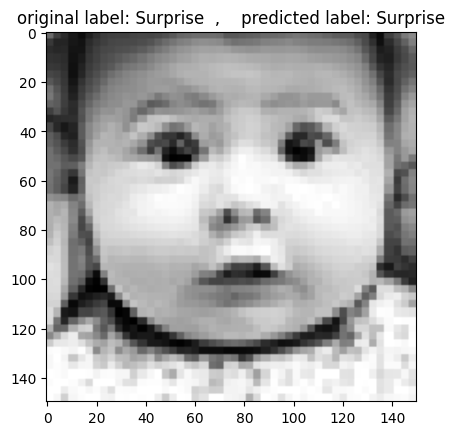

In [150]:
t=random.randint(0,test_img.shape[0]-1)
image=test_img[t]
original_label=class_labels[test_labels[t]]
predicted_label=class_labels[predictions[t]]
plt.imshow(image[:,:,0],cmap='gray')
plt.title('original label: '+original_label +'  ,  ' '  predicted label: '+ predicted_label)
plt.show()